In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

## In this notebook:
-  **Gluing lyrics together for each artist**

-  **term frequency of each artist**

-  **tf-idf for each artists'song lyrics**

-  **tf-idf based on phrase tokenizer**


-  **gluing lyrics for each album**

-  **term frequency of each album**

-  **tf-idf for each album**

In [77]:
lyrics = pd.read_csv('lyrics.csv')

In [20]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [21]:
lyrics.dtypes

album     object
artist    object
lyrics    object
song      object
dtype: object

## Cleanup

In [78]:
lyrics['lyrics'] = lyrics['lyrics'].replace('\n',' ',regex=True)

In [79]:
lyrics['lyrics'] = lyrics['lyrics'].str.lower()

In [68]:
#remove punctuation of lyrics column
lyrics.lyrics = lyrics.lyrics.str.replace('[^\w\s]','')
lyrics.lyrics = lyrics.lyrics.str.replace(r'\n','')
# lyrics['word_count']

           
           
        
            
        
   

In [80]:
def split_and_nospace(row):
    clean1 = row['lyrics'].split(' ')
    clean1 = [name for name in clean1 if name.strip()]
    return clean1


In [81]:
lyrics_split = lyrics.apply(split_and_nospace,axis = 1)
length = []
for n in lyrics_split:
    length.append(len(n))

length

[268,
 426,
 397,
 343,
 380,
 294,
 317,
 237,
 312,
 262,
 293,
 351,
 342,
 250,
 328,
 328,
 272,
 320,
 235,
 198,
 372,
 364,
 350,
 346,
 463,
 276,
 387,
 351,
 368,
 215,
 529,
 261,
 392,
 440,
 280,
 363,
 208,
 293,
 286,
 218,
 333,
 367,
 684,
 511,
 481,
 364,
 375,
 267,
 285,
 422,
 285,
 251,
 362,
 421,
 240,
 235,
 276,
 345,
 315,
 480,
 440,
 332,
 284,
 259,
 224,
 375,
 259,
 337,
 383,
 328,
 400,
 378,
 294,
 403]

In [82]:
lyrics['word_count'] = length

In [83]:
lyrics

,album,artist,lyrics,song,word_count
0,Shawn Mendes,Shawn Mendes,"help me, it's like the walls are caving in som...",In My Blood,268
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous,426
2,Shawn Mendes,Shawn Mendes,all it'd take is one flight we'd be in the sam...,Lost In Japan,397
3,Shawn Mendes,Shawn Mendes,"you said, ""i wanna get to know ya"" why you got...",Where Were You In The Morning?,343
4,Shawn Mendes,Shawn Mendes,sunrise with you on my chest no blinds in the ...,Fallin' All In You,380
5,Shawn Mendes,Shawn Mendes,"she don't listen to a thing, 'less it feels ri...",Particular Taste,294
6,Shawn Mendes,Shawn Mendes,"i know a girl, she's like a curse we want each...",Why,317
7,Shawn Mendes,Shawn Mendes,i think it's time that i be honest should've t...,Because I Had You,237
8,Shawn Mendes,Shawn Mendes,it's hard to believe you don't remember me at ...,Queen,312
9,Shawn Mendes,Shawn Mendes,"i want you close to me i want you close, i wan...",Mutual,262


## keyword/phrase analysis

In [128]:
#glue everything together for each artist
lyric_blocks = lyrics.groupby('artist').lyrics.apply(lambda lyric: ' '.join(lyric)).reset_index()

In [181]:
lyric_blocks.to_csv('lyrics_blocks.csv',index=False)
lyric_blocks

,artist,lyrics
0,Charlie Puth,yeah maybe i ma get a little anxious maybe i m...
1,Shawn Mendes,help me it s like the wall are caving in somet...


### Tokenizing

In [130]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

In [52]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if len(token)>=2]
    return words

In [53]:
def phrase(s):
    blob = TextBlob(s.lower())
    phrase = [phrase for phrase in blob.noun_phrases]
    return phrase

In [133]:
lyric_blocks.lyrics.apply(tokenize)

0    [yeah, maybe, i'ma, get, little, anxious, mayb...
1    [help, me, it, 's, like, the, walls, are, cavi...
Name: lyrics, dtype: object

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop.append("like")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('mr.')
stop.append("'ve")
stop.append("'re")
stop.append("it's")
stop.append("i'd")
stop.append("'ll")
stop.append("i'")
stop.append("'m")
stop.append("'d")
stop.append("ca")
stop.append('wan')
stop.append('im')
stop.append('ma')
stop.append('ima')
stop.append('ooh')


stop = set(stop)

In [136]:
lyric_blocks

,artist,lyrics
0,Charlie Puth,yeah maybe i'ma get a little anxious maybe i'...
1,Shawn Mendes,"help me, it's like the walls are caving in som..."


In [137]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(lyric_blocks.lyrics)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()

,'90s,'bout,'cause,'em,'less,'round,'til,23,25,a-ooh-ooh-ooh,...,wrong,ya,yeah,years,yell,yesterday,yet,young,youth,zone
0,5,4,40,16,0,4,0,1,0,1,...,8,5,56,0,0,4,1,7,0,0
1,0,4,92,0,2,0,4,0,1,0,...,28,3,122,6,1,0,1,0,21,1


In [138]:
big_table = pd.concat([lyric_blocks,results],axis = 1, join_axes = [lyric_blocks.index])

In [139]:
big_table = big_table.drop('lyrics',axis = 1)

In [140]:
term_table = big_table.T.reset_index()
term_table

,index,0,1
0,artist,Charlie Puth,Shawn Mendes
1,'90s,5,0
2,'bout,4,4
3,'cause,40,92
4,'em,16,0
5,'less,0,2
6,'round,4,0
7,'til,0,4
8,23,1,0
9,25,0,1


In [141]:
new_header = term_table.iloc[0] #grab the first row for the header
term_table = term_table[1:] #take the data less the header row
term_table.columns = new_header #set the header row as the df header


In [142]:
term_table.rename(columns={'artist':'word'},inplace=True)
charlie = term_table.sort_values(by='Charlie Puth',ascending = False)
shawn = term_table.sort_values(by='Shawn Mendes',ascending = False)

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [143]:
charlie = charlie[['word','Charlie Puth']].reset_index().drop(columns=['index'])
shawn = shawn[['word','Shawn Mendes']].reset_index().drop(columns=['index'])


### Tokenize by phrase

In [144]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words=stop, tokenizer=phrase)

matrix = vectorizer.fit_transform(lyric_blocks.lyrics)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()

,'90s baby,'cause ai n't,'cause baby i,'cause girl,'cause i,'cause i 'm,'cause i 've,'cause i wo n't,'cause i-i-i ca n't,'cause underneath,...,yeah i look,yeah i pretend,yeah life,yeah oh,yeah ooh,yeah talk,yeah woah,yeah yeah,’ s,’ t
0,1,0,0,1,14,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,3,2,10,5,6,2,3,2,...,2,1,1,1,1,1,0,5,1,1


In [145]:
big_table2 = pd.concat([lyric_blocks,results],axis = 1, join_axes = [lyric_blocks.index])

big_table2 = big_table2.drop('lyrics',axis = 1)

term_table2 = big_table2.T.reset_index()
term_table2

,index,0,1
0,artist,Charlie Puth,Shawn Mendes
1,'90s baby,1,0
2,'cause ai n't,0,1
3,'cause baby i,0,3
4,'cause girl,1,2
5,'cause i,14,10
6,'cause i 'm,0,5
7,'cause i 've,0,6
8,'cause i wo n't,0,2
9,'cause i-i-i ca n't,0,3


**seems like word is better...**

In [146]:
shawn.head(20)

,word,Shawn Mendes
0,know,252
1,oh,152
2,yeah,122
3,get,105
4,baby,103
5,got,94
6,'cause,92
7,na,88
8,air,82
9,take,74


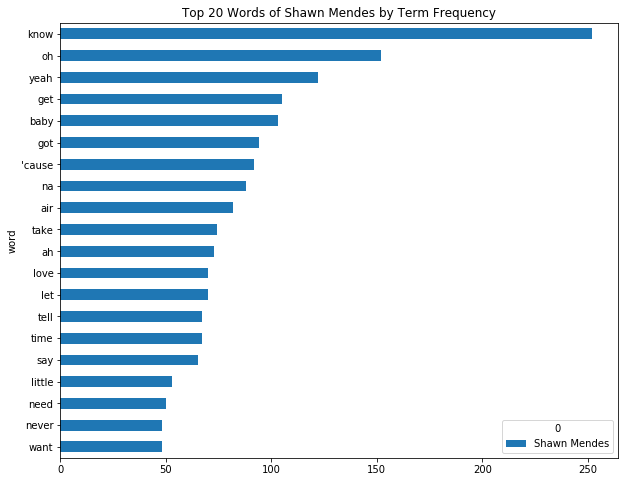

In [147]:
shawn.head(20).sort_values(by='Shawn Mendes').plot(x = 'word',kind='barh',figsize = (10,8),title = 'Top 20 Words of Shawn Mendes by Term Frequency')

In [148]:
charlie.head(20)

,word,Charlie Puth
0,baby,142
1,oh,116
2,love,98
3,run,86
4,river,70
5,got,69
6,know,67
7,left,56
8,yeah,56
9,one,53


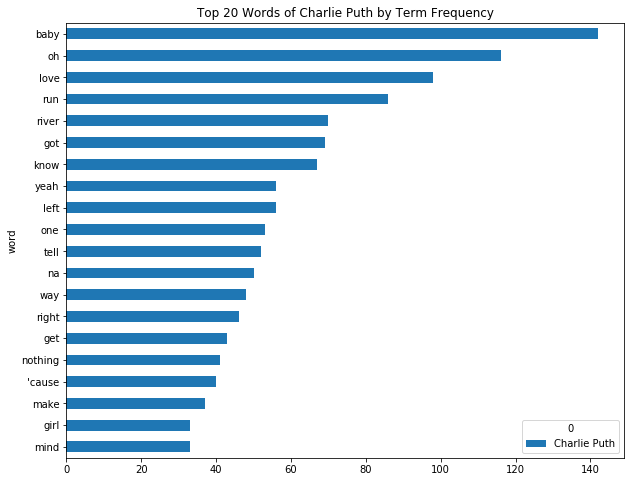

In [149]:
charlie.head(20).sort_values(by='Charlie Puth').plot(x = 'word',kind='barh',figsize = (10,8),title = 'Top 20 Words of Charlie Puth by Term Frequency')

In [150]:
pd.concat([charlie,shawn],axis = 1).to_csv('count_artist.csv',index=False)

### TF-IDF

In [151]:
def print_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))

def return_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    return sorted_list

In [152]:
lyrics

,album,artist,lyrics,song
0,Shawn Mendes,Shawn Mendes,"help me, it's like the walls are caving in som...",In My Blood
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous
2,Shawn Mendes,Shawn Mendes,all it'd take is one flight we'd be in the sam...,Lost In Japan
3,Shawn Mendes,Shawn Mendes,"you said, ""i wanna get to know ya"" why you got...",Where Were You In The Morning?
4,Shawn Mendes,Shawn Mendes,sunrise with you on my chest no blinds in the ...,Fallin' All In You
5,Shawn Mendes,Shawn Mendes,"she don't listen to a thing, 'less it feels ri...",Particular Taste
6,Shawn Mendes,Shawn Mendes,"i know a girl, she's like a curse we want each...",Why
7,Shawn Mendes,Shawn Mendes,i think it's time that i be honest should've t...,Because I Had You
8,Shawn Mendes,Shawn Mendes,it's hard to believe you don't remember me at ...,Queen
9,Shawn Mendes,Shawn Mendes,"i want you close to me i want you close, i wan...",Mutual


In [153]:
blocks = lyric_blocks
blocks

,artist,lyrics
0,Charlie Puth,yeah maybe i'ma get a little anxious maybe i'...
1,Shawn Mendes,"help me, it's like the walls are caving in som..."


In [154]:
#remove punctuation
blocks.lyrics = blocks.lyrics.str.replace('[^\w\s]',' ')



In [155]:
#lemnization
from textblob import Word
blocks.lyrics = blocks.lyrics.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(blocks.lyrics)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())


In [156]:
tfidf

,23,25,90,acapella,accusation,aching,across,act,actin,acting,...,wrong,ya,yeah,year,yell,yesterday,yet,young,youth,zone
0,0.003645,0.000000,0.018225,0.003645,0.003645,0.000000,0.000000,0.005187,0.01458,0.000000,...,0.020747,0.012967,0.145230,0.000000,0.000000,0.01458,0.002593,0.025515,0.000000,0.000000
1,0.000000,0.002513,0.000000,0.000000,0.000000,0.007538,0.005026,0.003576,0.00000,0.002513,...,0.050060,0.005364,0.218117,0.015077,0.002513,0.00000,0.001788,0.000000,0.052768,0.002513


In [157]:
tfidf = pd.concat([blocks,tfidf],axis = 1, join_axes = [blocks.index])

tfidf = tfidf.drop('lyrics',axis = 1)

tfidf = tfidf.drop('artist',axis = 1)




tfidf = tfidf.T.reset_index()

tfidf



,index,0,1
0,23,0.003645,0.000000
1,25,0.000000,0.002513
2,90,0.018225,0.000000
3,acapella,0.003645,0.000000
4,accusation,0.003645,0.000000
5,aching,0.000000,0.007538
6,across,0.000000,0.005026
7,act,0.005187,0.003576
8,actin,0.014580,0.000000
9,acting,0.000000,0.002513


In [158]:
tfidf = tfidf.rename(columns = {'index': 'word',0:'Charlie Puth',1: 'Shawn Mendes'})
tfidf


,word,Charlie Puth,Shawn Mendes
0,23,0.003645,0.000000
1,25,0.000000,0.002513
2,90,0.018225,0.000000
3,acapella,0.003645,0.000000
4,accusation,0.003645,0.000000
5,aching,0.000000,0.007538
6,across,0.000000,0.005026
7,act,0.005187,0.003576
8,actin,0.014580,0.000000
9,acting,0.000000,0.002513


In [159]:
tfidf

,word,Charlie Puth,Shawn Mendes
0,23,0.003645,0.000000
1,25,0.000000,0.002513
2,90,0.018225,0.000000
3,acapella,0.003645,0.000000
4,accusation,0.003645,0.000000
5,aching,0.000000,0.007538
6,across,0.000000,0.005026
7,act,0.005187,0.003576
8,actin,0.014580,0.000000
9,acting,0.000000,0.002513


In [160]:


ch_tfidf = tfidf.sort_values(by='Charlie Puth',ascending = False)
sh_tfidf = tfidf.sort_values(by='Shawn Mendes',ascending = False)

ch_tfidf = ch_tfidf[['word','Charlie Puth']].reset_index().drop(columns=['index'])
sh_tfidf = sh_tfidf[['word','Shawn Mendes']].reset_index().drop(columns=['index'])


In [161]:
ch_tfidf.head(20)

,word,Charlie Puth
0,baby,0.368262
1,oh,0.334548
2,run,0.313464
3,river,0.266080
4,love,0.254153
5,know,0.197098
6,got,0.178944
7,girl,0.147824
8,left,0.145230
9,yeah,0.145230


In [162]:
sh_tfidf.head(20)

,word,Shawn Mendes
0,know,0.480930
1,oh,0.271752
2,yeah,0.218117
3,ah,0.216329
4,get,0.214541
5,baby,0.184148
6,got,0.168057
7,cause,0.164482
8,take,0.160906
9,na,0.157330


**No big difference between tf and tfidf, let's go with the tf, which is more understandable by readers**

In [163]:
pd.concat([ch_tfidf,sh_tfidf],axis = 1).to_csv('tfidf_artist.csv',index=False)

## an album by album text analysis

In [46]:
#glue everything together for each artist
albums = lyrics.groupby('album').lyrics.apply(lambda lyric: ' '.join(lyric)).reset_index()

In [47]:
albums.to_csv('album_blocks.csv',index = False)
albums

,album,lyrics
0,Handwritten (Deluxe),i love it when you just dont care i love it wh...
1,Illuminate (Deluxe),i wanna follow her where she goes i think abou...
2,Nine Track Mind (Deluxe),im only one call away ill be there to save the...
3,Shawn Mendes,help me its like the walls are caving in somet...
4,Voicenotes,yeah maybe ima get a little anxious maybe ima...


In [166]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(albums.lyrics)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names(),index=albums.album.tolist())
results.head()


# 

,'90s,'bout,'cause,'em,'less,'round,'til,23,25,a-ooh-ooh-ooh,...,wrong,ya,yeah,years,yell,yesterday,yet,young,youth,zone
Handwritten (Deluxe),0,0,34,0,0,0,0,0,1,0,...,2,0,33,1,1,0,1,0,0,0
Illuminate (Deluxe),0,0,40,0,0,0,4,0,0,0,...,6,1,31,0,0,0,0,0,0,0
Nine Track Mind (Deluxe),0,0,23,0,0,0,0,0,0,0,...,1,1,17,0,0,4,0,0,0,0
Shawn Mendes,0,4,18,0,2,0,0,0,0,0,...,20,2,58,5,0,0,0,0,21,1
Voicenotes,5,4,17,16,0,4,0,1,0,1,...,7,4,39,0,0,0,1,7,0,0


In [167]:
results = results.T.reset_index()
results.rename(columns={'index':'word'},inplace=True)
results.head()

,word,Handwritten (Deluxe),Illuminate (Deluxe),Nine Track Mind (Deluxe),Shawn Mendes,Voicenotes
0,'90s,0,0,0,0,5
1,'bout,0,0,0,4,4
2,'cause,34,40,23,18,17
3,'em,0,0,0,0,16
4,'less,0,0,0,2,0


In [168]:
results.columns.values

array(['word', 'Handwritten (Deluxe)', 'Illuminate (Deluxe)',
       'Nine Track Mind (Deluxe)', 'Shawn Mendes', 'Voicenotes'],
      dtype=object)

In [169]:


handwritten = results.sort_values(by='Handwritten (Deluxe)',ascending = False)[['word','Handwritten (Deluxe)']].reset_index().drop(columns=['index'])
illuminate = results.sort_values(by='Illuminate (Deluxe)',ascending = False)[['word','Illuminate (Deluxe)']].reset_index().drop(columns=['index'])
ninetrack = results.sort_values(by='Nine Track Mind (Deluxe)',ascending=False)[['word','Nine Track Mind (Deluxe)']].reset_index().drop(columns=['index'])
shawnmendes = results.sort_values(by='Shawn Mendes',ascending = False)[['word','Shawn Mendes']].reset_index().drop(columns=['index'])
voicenotes = results.sort_values(by='Voicenotes',ascending = False)[['word','Voicenotes']].reset_index().drop(columns=['index'])



In [170]:
count_albums = pd.concat([handwritten,illuminate,ninetrack,shawnmendes,voicenotes],axis=1)
count_albums.to_csv('count_albums.csv',index=False)
count_albums

,word,Handwritten (Deluxe),word,Illuminate (Deluxe),word,Nine Track Mind (Deluxe),word,Shawn Mendes,word,Voicenotes
0,know,126,know,80,run,84,get,72,baby,115
1,oh,106,na,50,love,75,yeah,58,oh,68
2,air,77,baby,46,river,70,know,46,tell,47
3,ah,72,'cause,40,left,52,baby,36,yeah,39
4,got,35,got,38,oh,48,little,34,way,37
5,'cause,34,please,36,nothing,38,away,32,got,36
6,time,34,mercy,34,right,38,take,30,know,34
7,na,34,yeah,31,got,33,think,26,na,30
8,yeah,33,say,31,know,33,could,23,boy,26
9,love,32,oh,30,mind,32,want,23,one,26


In [173]:
#remove puctuation
blocks = albums
blocks.lyrics = blocks.lyrics.str.replace('[^\w\s]',' ')

#lemnization
from textblob import Word
blocks.lyrics = blocks.lyrics.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(blocks.lyrics)

# The easiest way to see what happenned is to make a dataframe
tfidf2 = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names(),index=blocks.album.tolist())

# results = results.T.reset_index()
# # results.rename(columns={'index':'word'},inplace=True)
# results.head()


tfidf2 = tfidf2.T.reset_index()
tfidf2.rename(columns={'index':'word'},inplace=True)
tfidf2.head()






,word,Handwritten (Deluxe),Illuminate (Deluxe),Nine Track Mind (Deluxe),Shawn Mendes,Voicenotes
0,23,0.000000,0.0,0.000000,0.0,0.008581
1,25,0.006505,0.0,0.000000,0.0,0.000000
2,90,0.000000,0.0,0.000000,0.0,0.042903
3,acapella,0.000000,0.0,0.007136,0.0,0.000000
4,accusation,0.000000,0.0,0.000000,0.0,0.008581


In [174]:
handwritten2 = tfidf2.sort_values(by='Handwritten (Deluxe)',ascending = False)[['word','Handwritten (Deluxe)']].reset_index().drop(columns=['index'])
illuminate2 = tfidf2.sort_values(by='Illuminate (Deluxe)',ascending = False)[['word','Illuminate (Deluxe)']].reset_index().drop(columns=['index'])
ninetrack2 = tfidf2.sort_values(by='Nine Track Mind (Deluxe)',ascending=False)[['word','Nine Track Mind (Deluxe)']].reset_index().drop(columns=['index'])
shawnmendes2 = tfidf2.sort_values(by='Shawn Mendes',ascending = False)[['word','Shawn Mendes']].reset_index().drop(columns=['index'])
voicenotes2 = tfidf2.sort_values(by='Voicenotes',ascending = False)[['word','Voicenotes']].reset_index().drop(columns=['index'])





In [175]:
tfidf_albums = pd.concat([handwritten2,illuminate2,ninetrack2,shawnmendes2,voicenotes2],axis=1)
tfidf_albums.to_csv('tfidf_albums.csv',index=False)
tfidf_albums

,word,Handwritten (Deluxe),word,Illuminate (Deluxe),word,Nine Track Mind (Deluxe),word,Shawn Mendes,word,Voicenotes
0,ah,0.522758,know,0.396785,river,0.520907,get,0.367596,baby,0.470199
1,know,0.418440,na,0.228038,run,0.483592,yeah,0.288116,oh,0.331184
2,oh,0.328553,mercy,0.217939,love,0.255015,know,0.233473,boy,0.223095
3,air,0.282180,baby,0.209795,left,0.176811,youth,0.218923,tell,0.192168
4,wah,0.143105,cause,0.182430,oh,0.163210,baby,0.178831,girl,0.171725
5,got,0.108485,got,0.173309,nothing,0.152765,perfectly,0.177223,doin,0.171612
6,time,0.108485,please,0.164187,right,0.129208,little,0.168896,know,0.159459
7,cause,0.105385,say,0.164187,mind,0.128644,away,0.158961,yeah,0.159459
8,na,0.105385,honest,0.154440,know,0.125808,take,0.149026,la,0.154450
9,yeah,0.102285,yeah,0.141383,got,0.112207,waitin,0.135524,miss,0.152301


In [176]:
tfidf_album = pd.read_csv('tfidf_albums.csv')
tfidf_artist = pd.read_csv('tfidf_artist.csv')
count_album = pd.read_csv('count_albums.csv')
count_artist = pd.read_csv('count_artist.csv')

In [179]:
tfidf_album.head(20)

,word,Handwritten (Deluxe),word.1,Illuminate (Deluxe),word.2,Nine Track Mind (Deluxe),word.3,Shawn Mendes,word.4,Voicenotes
0,ah,0.522758,know,0.396785,river,0.520907,get,0.367596,baby,0.470199
1,know,0.418440,na,0.228038,run,0.483592,yeah,0.288116,oh,0.331184
2,oh,0.328553,mercy,0.217939,love,0.255015,know,0.233473,boy,0.223095
3,air,0.282180,baby,0.209795,left,0.176811,youth,0.218923,tell,0.192168
4,wah,0.143105,cause,0.182430,oh,0.163210,baby,0.178831,girl,0.171725
5,got,0.108485,got,0.173309,nothing,0.152765,perfectly,0.177223,doin,0.171612
6,time,0.108485,please,0.164187,right,0.129208,little,0.168896,know,0.159459
7,cause,0.105385,say,0.164187,mind,0.128644,away,0.158961,yeah,0.159459
8,na,0.105385,honest,0.154440,know,0.125808,take,0.149026,la,0.154450
9,yeah,0.102285,yeah,0.141383,got,0.112207,waitin,0.135524,miss,0.152301


In [178]:
count_album.head(10)

,word,Handwritten (Deluxe),word.1,Illuminate (Deluxe),word.2,Nine Track Mind (Deluxe),word.3,Shawn Mendes,word.4,Voicenotes
0,know,126,know,80,run,84,get,72,baby,115
1,oh,106,na,50,love,75,yeah,58,oh,68
2,air,77,baby,46,river,70,know,46,tell,47
3,ah,72,'cause,40,left,52,baby,36,yeah,39
4,got,35,got,38,oh,48,little,34,way,37
5,'cause,34,please,36,nothing,38,away,32,got,36
6,time,34,mercy,34,right,38,take,30,know,34
7,na,34,yeah,31,got,33,think,26,na,30
8,yeah,33,say,31,know,33,could,23,boy,26
9,love,32,oh,30,mind,32,want,23,one,26


## How Repetitive is each singer

In [84]:
def print_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:10]
    print('\n'.join([str(x) for x in sorted_list]))

def return_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:10]
    return sorted_list

In [85]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(lyrics.lyrics)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names(),index=lyrics.song.tolist())
results


,'90s,'bout,'cause,'em,'less,'round,'til,23,25,a-ooh-ooh-ooh,...,wrong,ya,yeah,years,yell,yesterday,yet,young,youth,zone
In My Blood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nervous,0,1,1,0,0,0,0,0,0,0,...,0,0,14,0,0,0,0,0,0,0
Lost In Japan,0,3,4,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
Where Were You In The Morning?,0,0,1,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,0
Fallin' All In You,0,0,2,0,0,0,0,0,0,0,...,3,0,5,1,0,0,0,0,0,0
Particular Taste,0,0,0,0,2,0,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
Why,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Because I Had You,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Queen,0,0,1,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
big_list = []
for i in range(0,74):
    song = return_sorted_vector(results.iloc[i,:])
    big_list.append(song)



In [87]:
df_counting=pd.DataFrame(big_list).T
df_counting.columns = results.index
df_counting = df_counting.T.add_prefix('word_')
df_counting = df_counting.reset_index()
df_counting.rename(columns = {'index':'song'},inplace=True)
df_counting

,song,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
0,In My Blood,"(blood, 10)","(feel, 8)","(help, 7)","(sometimes, 6)","(somebody, 6)","(giving, 6)","(need, 5)","(walls, 4)","(caving, 4)","(someone, 3)"
1,Nervous,"(little, 33)","(get, 27)","(think, 17)","(yeah, 14)","(excited, 11)","(bit, 10)","(baby, 7)","(talk, 6)","(self-conscious, 6)","(much, 6)"
2,Lost In Japan,"(get, 28)","(mind, 18)","(tonight, 16)","(lost, 10)","(let, 8)","(got, 8)","(could, 7)","(thinking, 6)","(seem, 6)","(plans, 5)"
3,Where Were You In The Morning?,"(walk, 8)","(morning, 8)","(baby, 8)","(away, 8)","(without, 4)","(warning, 4)","(said, 4)","(number, 4)","(left, 4)","(leave, 4)"
4,Fallin' All In You,"(free, 6)","(falling, 6)","(baby, 6)","(yeah, 5)","(love, 5)","(mine, 4)","(anytime, 4)","(wrong, 3)","(underneath, 3)","(trapped, 3)"
5,Particular Taste,"(particular, 12)","(yeah, 10)","(goes, 8)","(obsessed, 7)","(right, 6)","(got, 6)","(taste, 5)","(place, 4)","(waste, 3)","(time, 3)"
6,Why,"(get, 7)","(put, 6)","(hell, 6)","(know, 5)","(want, 4)","(nothing, 4)","(say, 3)","(ready, 3)","(pretend, 3)","(met, 3)"
7,Because I Had You,"(somebody, 5)","(time, 4)","(nothin, 4)","(could, 4)","(tell, 3)","(something, 3)","(new, 3)","(might, 3)","(loving, 3)","(help, 3)"
8,Queen,"(queen, 11)","(made, 9)","(ugly, 7)","(making, 7)","(look, 7)","(beautiful, 7)","(yeah, 5)","(way, 4)","(think, 4)","(ruler, 4)"
9,Mutual,"(want, 16)","(way, 4)","(tell, 3)","(say, 3)","(reciprocate, 3)","(need, 3)","(mutual, 3)","(leave, 3)","(know, 3)","(involved, 3)"


In [121]:
df_counting.to_csv('track_count_tfidf.csv',index=False)

In [88]:
bigtable = lyrics.merge(df_counting,on='song')
bigtable.head()

,album,artist,lyrics,song,word_count,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
0,Shawn Mendes,Shawn Mendes,"help me, it's like the walls are caving in som...",In My Blood,268,"(blood, 10)","(feel, 8)","(help, 7)","(sometimes, 6)","(somebody, 6)","(giving, 6)","(need, 5)","(walls, 4)","(caving, 4)","(someone, 3)"
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous,426,"(little, 33)","(get, 27)","(think, 17)","(yeah, 14)","(excited, 11)","(bit, 10)","(baby, 7)","(talk, 6)","(self-conscious, 6)","(much, 6)"
2,Shawn Mendes,Shawn Mendes,all it'd take is one flight we'd be in the sam...,Lost In Japan,397,"(get, 28)","(mind, 18)","(tonight, 16)","(lost, 10)","(let, 8)","(got, 8)","(could, 7)","(thinking, 6)","(seem, 6)","(plans, 5)"
3,Shawn Mendes,Shawn Mendes,"you said, ""i wanna get to know ya"" why you got...",Where Were You In The Morning?,343,"(walk, 8)","(morning, 8)","(baby, 8)","(away, 8)","(without, 4)","(warning, 4)","(said, 4)","(number, 4)","(left, 4)","(leave, 4)"
4,Shawn Mendes,Shawn Mendes,sunrise with you on my chest no blinds in the ...,Fallin' All In You,380,"(free, 6)","(falling, 6)","(baby, 6)","(yeah, 5)","(love, 5)","(mine, 4)","(anytime, 4)","(wrong, 3)","(underneath, 3)","(trapped, 3)"


In [123]:
bigtable.to_csv('track_info_plus_tfidf.csv',index=False)

In [89]:
# Top repetitive song of Charlie
charlie1 = bigtable[bigtable.artist =='Charlie Puth']


# Most repetitive song of charlie
words = []
freqs = []

for i in charlie1['word_0']:
    word = i[0]
    freq = float(i[1])

    if freq != 0 :
        words.append(word)
        freqs.append(freq)

charlie1['most_rep'] = words
charlie1['most_freq'] = freqs


#most 10 repetitive songs of charlie
charlie10_rep = charlie1.sort_values(by='most_freq',ascending = False).head(10)
charlie10_rep


/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,album,artist,lyrics,song,word_count,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,most_rep,most_freq
71,Nine Track Mind (Deluxe),Charlie Puth,don't run from me river don't run from me rive...,River,378,"(run, 71)","(river, 70)","(oh, 8)","(love, 7)","(view, 3)","(things, 3)","(rivers, 3)","(mind, 3)","(maybe, 3)","(looking, 3)",run,71.0
62,Nine Track Mind (Deluxe),Charlie Puth,oh i been hurting lately i'm down on all my lu...,Left Right Left,284,"(left, 48)","(right, 34)","(one, 7)","(step, 6)","(almost, 6)","(times, 3)","(regrets, 3)","(moving, 3)","(know, 3)","(got, 3)",left,48.0
46,Voicenotes,Charlie Puth,what you thinking? you think that you could be...,Done For Me (feat. Kehlani),375,"(baby, 36)","(tell, 16)","(done, 16)","(oh, 14)","(wo, 7)","(honestly, 7)","(things, 4)","(say, 4)","(lie, 4)","(die, 4)",baby,36.0
70,Voicenotes,Charlie Puth,told you i'm moving out to bigger and better t...,LA Girls,400,"(baby, 30)","(miss, 22)","(ooh-ooh-ooh, 20)","(la, 17)","(girls, 17)","(messing, 10)","(world, 5)","(ooh-ooh-ooh-ooh-ooh, 5)","(weather, 3)","(tiffany, 3)",baby,30.0
53,Voicenotes,Charlie Puth,"ooh, the way that you dance on me makes me not...",Empty Cups,421,"(oh, 25)","(na, 11)","(empty, 10)","(cups, 10)","(one, 9)","(party, 8)","(hands, 8)","(body, 8)","(let, 7)","(room, 6)",oh,25.0
43,Voicenotes,Charlie Puth,yeah maybe i'ma get a little anxious maybe i'...,The Way I Am,511,"(way, 25)","(i'ma, 21)","(tell, 16)","('em, 16)","(love, 8)","(hate, 8)","(either, 8)","(could, 8)","(get, 7)","(maybe, 6)",way,25.0
58,Nine Track Mind (Deluxe),Charlie Puth,"i'm run, yeah, oh yeah i'm run, yeah like my m...",Losing My Mind,315,"(mind, 23)","(losing, 14)","(yeah, 12)","(run, 11)","(lose, 11)","(time, 9)","(oh, 9)","(nothing, 8)","(enough, 7)","(much, 6)",mind,23.0
59,Nine Track Mind (Deluxe),Charlie Puth,we don't talk anymore we don't talk anymore we...,We Don't Talk Anymore (feat. Selena Gomez),480,"(anymore, 23)","(talk, 19)","(oh, 11)","(used, 9)","(love, 9)","(way, 5)","(known, 5)","(shame, 4)","(overdosed, 4)","(na, 4)",anymore,23.0
49,Voicenotes,Charlie Puth,i got these girls tryna lock me down and i alw...,BOY,422,"(boy, 22)","(treat, 18)","(baby, 8)","(dare, 6)","(young, 5)","(wanted, 5)","(tell, 5)","(na, 5)","(beside, 5)","('cause, 5)",boy,22.0
60,Nine Track Mind (Deluxe),Charlie Puth,i'd stroll into a bank and put a ski mask on a...,My Gospel,440,"(love, 21)","(make, 10)","(wo, 6)","(nothing, 6)","(crazy, 6)","(baby, 5)","(throw, 4)","(need, 4)","(know, 4)","(afraid, 4)",love,21.0


In [90]:
charlie5 = df_counting.iloc[list(charlie10_rep.head().index)].T
charlie5.columns = charlie5.loc['song']
charlie5.drop('song',axis = 0,inplace = True)
charlie5


    

song,River,Left Right Left,Done For Me (feat. Kehlani),LA Girls,Empty Cups
word_0,"(run, 71)","(left, 48)","(baby, 36)","(baby, 30)","(oh, 25)"
word_1,"(river, 70)","(right, 34)","(tell, 16)","(miss, 22)","(na, 11)"
word_2,"(oh, 8)","(one, 7)","(done, 16)","(ooh-ooh-ooh, 20)","(empty, 10)"
word_3,"(love, 7)","(step, 6)","(oh, 14)","(la, 17)","(cups, 10)"
word_4,"(view, 3)","(almost, 6)","(wo, 7)","(girls, 17)","(one, 9)"
word_5,"(things, 3)","(times, 3)","(honestly, 7)","(messing, 10)","(party, 8)"
word_6,"(rivers, 3)","(regrets, 3)","(things, 4)","(world, 5)","(hands, 8)"
word_7,"(mind, 3)","(moving, 3)","(say, 4)","(ooh-ooh-ooh-ooh-ooh, 5)","(body, 8)"
word_8,"(maybe, 3)","(know, 3)","(lie, 4)","(weather, 3)","(let, 7)"
word_9,"(looking, 3)","(got, 3)","(die, 4)","(tiffany, 3)","(room, 6)"


In [91]:
words = []
freqs = []
songs = []
for i in charlie5.columns:
    for n in charlie5[i]:
        word = n[0]
        freq = int(n[1])
        song = i
        words.append(word)
        freqs.append(freq)
        songs.append(i)
charlie55 = pd.DataFrame({
    'song':songs,
    'word':words,
    'counts':freqs
})

In [92]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [93]:
import matplotlib.pyplot as plt
from cycler import cycler



plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',


  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,

 
  'grid.linestyle': '--',
  'grid.linewidth': 1.5,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

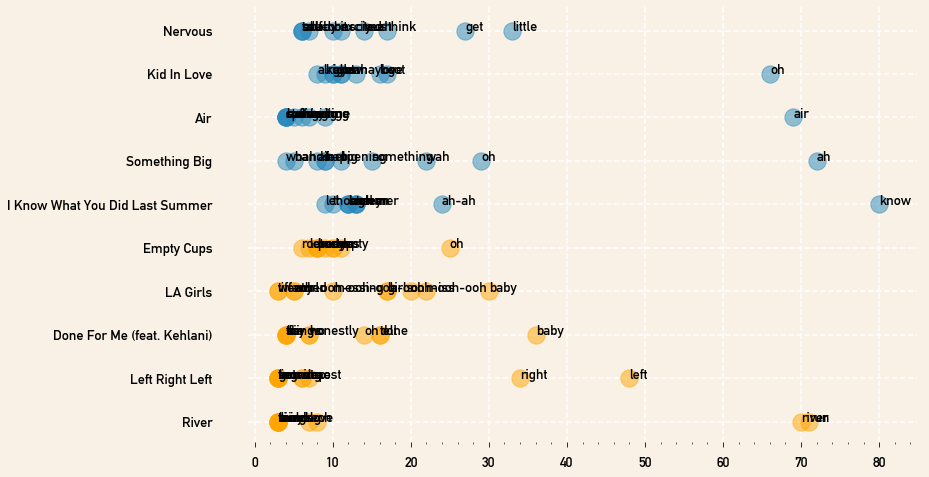

In [119]:

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(charlie55.counts,charlie55.song,s=300,alpha=0.5,color = 'orange')

ax.scatter(shawn55.counts, shawn55.song,s=300,alpha=0.5,color = '#2988bc')

for i, txt in enumerate(shawn55.word):
    ax.annotate(txt, (shawn55.counts.iat[i],shawn55.song.iat[i]))


for i, txt in enumerate(charlie55.word):
    ax.annotate(txt, (charlie55.counts.iat[i],charlie55.song.iat[i]))
plt.savefig('rep_h_2.pdf',bbox_inches='tight')

In [96]:
# Top repetitive song of Shawn
shawn1 = bigtable[bigtable.artist =='Shawn Mendes']
shawn1.shape

# Most repetitive song of charlie
words = []
freqs = []

for i in shawn1['word_0']:
    word = i[0]
    freq = float(i[1])

    if freq != 0 :
        words.append(word)
        freqs.append(freq)
shawn1['most_rep'] = words
shawn1['most_freq'] = freqs


#most 10 repetitive songs of charlie
shawn10_rep = shawn1.sort_values(by='most_freq',ascending = False).head(10)
shawn10_rep

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,album,artist,lyrics,song,word_count,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,most_rep,most_freq
42,Handwritten (Deluxe),Shawn Mendes,"ah-ah, he-ey ah-ah, ah-ah ah-ah, he-ey ah-ah, ...",I Know What You Did Last Summer,684,"(know, 80)","(ah-ah, 24)","(tell, 13)","(seem, 13)","(mean, 13)","(summer, 12)","(last, 12)","(he-ey, 12)","(though, 10)","(let, 9)",know,80.0
32,Handwritten (Deluxe),Shawn Mendes,"1, 2, 3, 4 oh wah ah ah oh, wah ah ah ah ah ah...",Something Big,392,"(ah, 72)","(oh, 29)","(wah, 22)","(something, 15)","(big, 11)","(happening, 9)","(feel, 9)","(air, 8)","(hands, 5)","(woah, 4)",ah,72.0
35,Handwritten (Deluxe),Shawn Mendes,shawn: never thought that we would end up here...,Air,363,"(air, 69)","(time, 9)","(trying, 7)","(hard, 6)","(mean, 5)","(suffocating, 4)","(stringing, 4)","(spare, 4)","(harm, 4)","(coming, 4)",air,69.0
30,Handwritten (Deluxe),Shawn Mendes,i know that we just met maybe this is dumb but...,Kid In Love,529,"(oh, 66)","(got, 17)","(love, 16)","(maybe, 13)","(yeah, 11)","(na, 11)","(grow, 10)","(ever, 10)","(kid, 9)","(alright, 8)",oh,66.0
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous,426,"(little, 33)","(get, 27)","(think, 17)","(yeah, 14)","(excited, 11)","(bit, 10)","(baby, 7)","(talk, 6)","(self-conscious, 6)","(much, 6)",little,33.0
2,Shawn Mendes,Shawn Mendes,all it'd take is one flight we'd be in the sam...,Lost In Japan,397,"(get, 28)","(mind, 18)","(tonight, 16)","(lost, 10)","(let, 8)","(got, 8)","(could, 7)","(thinking, 6)","(seem, 6)","(plans, 5)",get,28.0
68,Shawn Mendes,Shawn Mendes,"here i am, stuck on this couch scrolling throu...",Youth feat. Khalid,383,"(youth, 21)","(away, 21)","(take, 20)","(never, 10)","(wo, 8)","(wake, 8)","(today, 8)","(soul, 8)","(mine, 8)","(long, 8)",youth,21.0
20,Illuminate (Deluxe),Shawn Mendes,"damn, you look so good with your clothes on an...",Lights On,372,"(na, 18)","(love, 11)","(lights, 11)","(see, 9)","(get, 9)","(way, 8)","(night, 8)","(move, 8)","(lost, 8)","(inch, 8)",na,18.0
10,Shawn Mendes,Shawn Mendes,"taste the poison from your lips lately, we're ...",Perfectly Wrong,293,"(wrong, 17)","(perfectly, 17)","(yeah, 10)","(oh, 7)","(know, 6)","(leave, 4)","(hard, 4)","(much, 3)","(hate, 3)","(break, 3)",wrong,17.0
15,Illuminate (Deluxe),Shawn Mendes,i won't lie to you i know he's just not right ...,Treat You Better,328,"(better, 17)","(know, 11)","(treat, 9)","(time, 5)","(tell, 5)","(wasting, 3)","(wasted, 3)","(want, 3)","(promise, 3)","(let, 3)",better,17.0


In [97]:
shawn5 = df_counting.iloc[list(shawn10_rep.head().index)].T
shawn5.columns = shawn5.loc['song']
shawn5.drop('song',axis = 0,inplace = True)



    

words = []
freqs = []
songs = []
for i in shawn5.columns:
    for n in shawn5[i]:
        word = n[0]
        freq = int(n[1])
        song = i
        words.append(word)
        freqs.append(freq)
        songs.append(i)
shawn55 = pd.DataFrame({
    'song':songs,
    'word':words,
    'counts':freqs
})





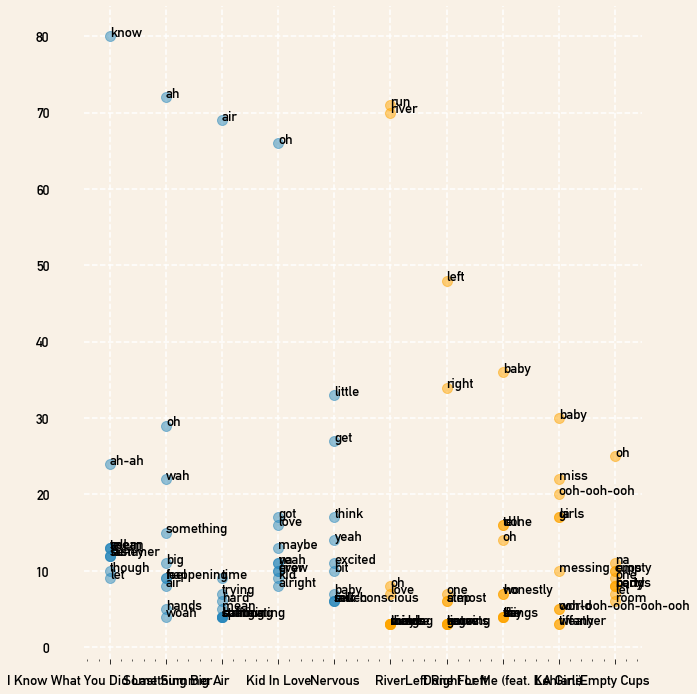

In [108]:


fig, ax = plt.subplots(figsize=(10,12))

ax.scatter(shawn55.song, shawn55.counts,s=100,alpha=0.5,color = '#2988bc')

ax.scatter(charlie55.song,charlie55.counts,s=100,alpha=0.5,color = 'orange')



for i, txt in enumerate(shawn55.word):
    ax.annotate(txt, (shawn55.song.iat[i],shawn55.counts.iat[i]))
    
for i, txt in enumerate(charlie55.word):
    ax.annotate(txt, (charlie55.song.iat[i],charlie55.counts.iat[i]))


# plt.savefig('shawn_rep.pdf',bbox_inches='tight')

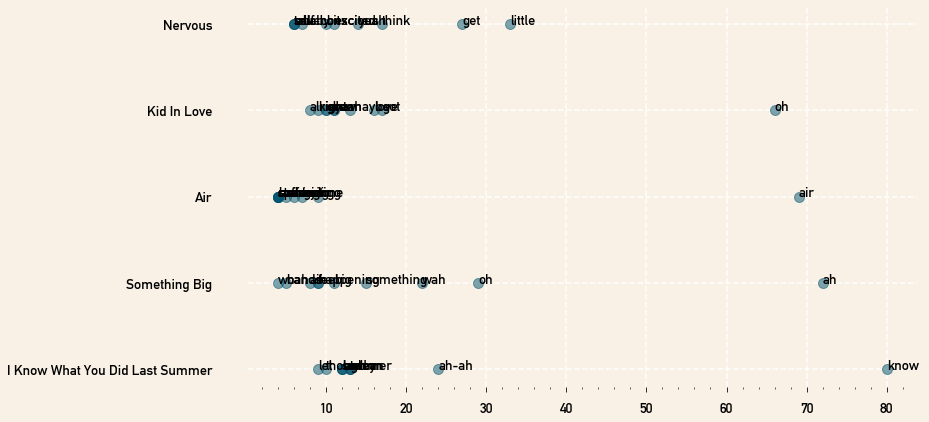

In [98]:

fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(shawn55.counts, shawn55.song,s=100,alpha=0.5)

for i, txt in enumerate(shawn55.word):
    ax.annotate(txt, (shawn55.counts.iat[i],shawn55.song.iat[i]))
# plt.savefig('charlie_rep_h.pdf',bbox_inches='tight')

### Top 10 Lengthy song 

In [504]:
charlie10_len = charlie1.sort_values(by='word_count',ascending = False)
charlie10_len.head(10)

,album,artist,lyrics,song,word_count,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,most_rep,most_freq
43,Voicenotes,Charlie Puth,yeah maybe i ma get a little anxious maybe i ...,The Way I Am,573,"(way, 25)","(i'ma, 21)","(tell, 16)","('em, 16)","(love, 8)","(hate, 8)","(either, 8)","(could, 8)","(get, 7)","(maybe, 6)","(little, 6)","(trying, 5)","(wanted, 4)","(somebody, 4)","(one, 4)","(oh, 4)","(yeah, 3)","(okay, 3)","(na, 3)","(know, 3)",way,25.0
59,Nine Track Mind (Deluxe),Charlie Puth,we don t talk anymore we don t talk anymore we...,We Don't Talk Anymore (feat. Selena Gomez),551,"(anymore, 23)","(talk, 19)","(oh, 11)","(used, 9)","(love, 9)","(way, 5)","(known, 5)","(shame, 4)","(overdosed, 4)","(na, 4)","(know, 4)","(get, 4)","(game, 4)","(brain, 4)","(wearing, 3)","(tonight, 3)","(tight, 3)","(onto, 3)","(looking, 3)","(kind, 3)",anymore,23.0
44,Voicenotes,Charlie Puth,you ve been runnin round runnin round runn...,Attention,507,"(doin, 20)","(knew, 13)","(want, 10)","(round, 9)","(huh, 8)","(attention, 7)","(runnin, 6)","(know, 6)","(yeah, 4)","(ya, 4)","(thinking, 4)","(sure, 4)","(start, 4)","(oh, 4)","(never, 4)","(mine, 4)","(making, 4)","(karma, 4)","(got, 4)","(gettin, 4)",doin,20.0
60,Nine Track Mind (Deluxe),Charlie Puth,i d stroll into a bank and put a ski mask on a...,My Gospel,478,"(love, 21)","(make, 10)","(wo, 6)","(nothing, 6)","(crazy, 6)","(baby, 5)","(throw, 4)","(need, 4)","(know, 4)","(afraid, 4)","('cause, 4)","(want, 3)","(trust, 3)","(pride, 3)","(oh, 3)","(look, 3)","(less, 3)","(knows, 3)","(insane, 3)","(girl, 3)",love,21.0
70,Voicenotes,Charlie Puth,told you i m moving out to bigger and better t...,LA Girls,472,"(baby, 30)","(miss, 22)","(ooh-ooh-ooh, 20)","(la, 17)","(girls, 17)","(messing, 10)","(world, 5)","(ooh-ooh-ooh-ooh-ooh, 5)","(weather, 3)","(tiffany, 3)","(say, 3)","(room, 3)","(oh, 3)","(nicole, 3)","(nicky, 3)","(hell, 3)","(heather, 3)","(get, 3)","(east, 3)","(could, 3)",baby,30.0
49,Voicenotes,Charlie Puth,i got these girls tryna lock me down and i alw...,BOY,449,"(boy, 22)","(treat, 18)","(baby, 8)","(dare, 6)","(young, 5)","(wanted, 5)","(tell, 5)","(na, 5)","(beside, 5)","('cause, 5)","('90s, 5)","(wo, 4)","(work, 3)","(wake, 3)","(love, 3)","(left, 3)","(know, 3)","(gave, 3)","(born, 3)","(way, 2)",boy,22.0
53,Voicenotes,Charlie Puth,ooh the way that you dance on me makes me not...,Empty Cups,448,"(oh, 25)","(na, 11)","(empty, 10)","(cups, 10)","(one, 9)","(party, 8)","(hands, 8)","(body, 8)","(let, 7)","(room, 6)","(real, 6)","(another, 6)","(turn, 5)","(us, 4)","(television, 4)","(take, 4)","(nobody, 4)","(listen, 4)","(go, 4)","(moment, 3)",oh,25.0
71,Nine Track Mind (Deluxe),Charlie Puth,don t run from me river don t run from me rive...,River,433,"(run, 71)","(river, 70)","(oh, 8)","(love, 7)","(view, 3)","(things, 3)","(rivers, 3)","(mind, 3)","(maybe, 3)","(looking, 3)","(fall, 3)","(different, 3)","('cause, 3)","(look, 2)","(hurt, 2)","(words, 1)","(water, 1)","(want, 1)","(say, 1)","(rush, 1)",run,71.0
73,Nine Track Mind (Deluxe),Charlie Puth,i m facing the bottle for all of my problems t...,Nothing But Trouble - Instagram Models Dance R...,432,"(trouble, 6)","(nothing, 6)","(models, 6)","(instagram, 6)","(going, 6)","(wanted, 5)","(said, 4)","(open, 4)","(oh, 4)","(lord, 4)","(uh, 3)","(throttle, 3)","(problems, 3)","(posted, 3)","(met, 3)","(liar, 3)","(full, 3)","(facing, 3)","(emotions, 3)","(dying, 3)",trouble,6.0
46,Voicenotes,Charlie Puth,what you thinking you think that you could be...,Done For Me (feat. Kehlani),405,"(baby, 36)","(tell, 16)","(done, 16)","(oh, 14)","(wo, 7)","(honestly, 7)","(things, 4)","(say, 4)","(lie, 4)","(die, 4)","(cry, 4)","(please, 3)","(know, 3)","(knees, 3)","(given, 3)","(everything, 3)","(love, 2)","(ground, 2)","(fall, 2)","(beg, 2)",baby,36.0


In [441]:
shawn10_len = shawn1.sort_values(by='word_count',ascending = False)

### Which 2 songs are most similar according to tf-idf analysis?

In [125]:
lyrics

,album,artist,lyrics,song,word_count
0,Shawn Mendes,Shawn Mendes,"help me, it's like the wall are caving in some...",In My Blood,268
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous,426
2,Shawn Mendes,Shawn Mendes,all it'd take is one flight we'd be in the sam...,Lost In Japan,397
3,Shawn Mendes,Shawn Mendes,"you said, ""i wanna get to know ya"" why you got...",Where Were You In The Morning?,343
4,Shawn Mendes,Shawn Mendes,sunrise with you on my chest no blind in the p...,Fallin' All In You,380
5,Shawn Mendes,Shawn Mendes,"she don't listen to a thing, 'less it feel rig...",Particular Taste,294
6,Shawn Mendes,Shawn Mendes,"i know a girl, she's like a curse we want each...",Why,317
7,Shawn Mendes,Shawn Mendes,i think it's time that i be honest should've t...,Because I Had You,237
8,Shawn Mendes,Shawn Mendes,it's hard to believe you don't remember me at ...,Queen,312
9,Shawn Mendes,Shawn Mendes,"i want you close to me i want you close, i wan...",Mutual,262


In [110]:
#tfidf-for each song
#lemnization
from textblob import Word
lyrics.lyrics = lyrics.lyrics.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenize)

matrix = vectorizer.fit_transform(lyrics.lyrics)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head(10)

,'90s,'bout,'cause,'em,'less,'round,'til,23,25,a-ooh-ooh-ooh,...,ya,yeah,year,years,yell,yesterday,yet,young,youth,zone
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.027428,0.010238,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.141270,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.106886,0.053194,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.031954,0.026216,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.041911
3,0.0,0.000000,0.023871,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.057357,0.047057,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.040158,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.098954,0.0,0.063279,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.000000,0.0,0.110697,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.173105,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.000000,0.026728,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.026345,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.067059,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.000000,0.016073,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.079212,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027427,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [111]:
big_list = []
for i in range(0,74):
    song = return_sorted_vector(tfidf.iloc[i,:])
    big_list.append(song)

In [112]:
df_tfidf=pd.DataFrame(big_list)
df_tfidf.to_csv('tfidf_song.csv',index=False)
df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9
0,"(blood, 0.6163787768017122)","(giving, 0.29654778664474446)","(sometimes, 0.28196679361805893)","(help, 0.2812996671391807)","(caving, 0.24655151072068485)","(feel, 0.223779361291639)","(somebody, 0.22013166799231063)","(wall, 0.19769852442982966)","(need, 0.14258268428216167)","(better, 0.1294798468007812)"
1,"(little, 0.6521744303259924)","(excited, 0.35490322781469297)","(get, 0.32664239833078623)","(bit, 0.27427856445216214)","(think, 0.26959337625810087)","(self-conscious, 0.19358357880801436)","(stressed, 0.16131964900667864)","(nervous, 0.1471750411863455)","(yeah, 0.1412700073790746)","(talk, 0.12620949124095365)"
2,"(tonight, 0.46954490829833145)","(get, 0.4400210632137861)","(mind, 0.387126853379254)","(lost, 0.2827908399900864)","(i-i-i, 0.20955301397866713)","(seem, 0.201637320488405)","(plan, 0.17814289891094787)","(thinking, 0.16967450399405182)","(let, 0.15511828690809118)","(japan, 0.12573180838720027)"
3,"(morning, 0.5116271329404508)","(walk, 0.39237602764946367)","(away, 0.3158782447661728)","(warning, 0.274533828456346)","(number, 0.274533828456346)","(without, 0.21939783130662271)","(baby, 0.21195607023695678)","(left, 0.17429284195349598)","(leave, 0.1616585772405812)","(said, 0.1579391223830864)"
4,"(falling, 0.3227623135222004)","(free, 0.28947246199425725)","(mine, 0.20296105745293458)","(anytime, 0.20296105745293458)","(trapped, 0.1898358452983163)","(tightrope, 0.1898358452983163)","(since, 0.1898358452983163)","(safety, 0.1898358452983163)","(net, 0.1898358452983163)","(men, 0.1898358452983163)"


In [113]:
def doc_similarity(a_vec,b_vec):
    total = 0
    for word in a_vec:
        if word in b_vec:
            total += a_vec[word]*b_vec[word]
    return total

import math
def doc_distance(a_vec,b_vec):
    a_vec = a_vec/math.sqrt(sum([x*x for x in a_vec]))
    b_vec = b_vec/math.sqrt(sum([x*x for x in b_vec]))
    similarity = a_vec.dot(b_vec)
    return (1-similarity)

def dij(i,j):
    return doc_distance(tfidf.iloc[i], tfidf.iloc[j])





        

In [114]:
tfidf_shawn = tfidf[lyrics.artist == 'Shawn Mendes']
tfidf_charlie = tfidf[lyrics.artist == 'Charlie Puth']

In [115]:
closest = 1
song1 = 0
song2 = 0
for i in tfidf_shawn.index:
    for n in tfidf_charlie.index:
        distance = dij(i,n)
        if distance < closest:
            closest = distance
            song1 = bigtable.iloc[i].song
            song2 = bigtable.iloc[n].song
            loc1 = i
            loc2 = n

    
print('closest distance is',str(closest),'between',str(song1),'and',str(song2))
print(loc1,loc2)

closest distance is 0.6612370598513961 between No Promises and Patient
19 47


In [124]:
df_tfidf.iloc[19]

0             (please, 0.5645283846637179)
1            (promise, 0.5348809577285236)
2              (baby, 0.35233481178919396)
3        (consequence, 0.2308695003378627)
4    (over-complicate, 0.1539130002252418)
5             (living, 0.1539130002252418)
6            ('cause, 0.14651349271204867)
7               (keep, 0.1424145641866946)
8            (moment, 0.10777264694943638)
9                (wo, 0.10093062344231589)
Name: 19, dtype: object

In [127]:
df_tfidf.iloc[47]

0     (patient, 0.690003740186558)
1     (please, 0.4542504405212198)
2     (trust, 0.29328918778697055)
3    (another, 0.1676924661294475)
4        (na, 0.16452296879267492)
5      (baby, 0.16200450076221315)
6      (wait, 0.14995249345618453)
7       (gon, 0.12657588211623577)
8      (need, 0.10640922880897115)
9    (minute, 0.10491729671079406)
Name: 47, dtype: object

**Most similar song based on tfidf analysis and the difference between two vector:**

- **No Promises by Shawn Mendes**

-  **Patient by Charlie Puth**

In [499]:
bigtable

,album,artist,lyrics,song,word_count,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19
0,Shawn Mendes,Shawn Mendes,help me it s like the walls are caving in som...,In My Blood,293,"(blood, 10)","(feel, 8)","(help, 7)","(sometimes, 6)","(somebody, 6)","(giving, 6)","(need, 5)","(walls, 4)","(caving, 4)","(someone, 3)","(better, 3)","(take, 2)","(strong, 2)","(skin, 2)","(medicine, 2)","(feeling, 2)","(enough, 2)","(crawling, 2)","(could, 2)","(way, 1)"
1,Shawn Mendes,Shawn Mendes,i saw you on a sunday in a café and all you di...,Nervous,441,"(little, 33)","(get, 27)","(think, 17)","(yeah, 14)","(excited, 11)","(bit, 10)","(baby, 7)","(talk, 6)","(self-conscious, 6)","(much, 6)","(around, 6)","(stressed, 5)","(nervous, 5)","(babe, 5)","(started, 2)","(know, 2)","(way, 1)","(walked, 1)","(walk, 1)","(usually, 1)"
2,Shawn Mendes,Shawn Mendes,all it d take is one flight we d be in the sam...,Lost In Japan,444,"(get, 28)","(mind, 18)","(tonight, 16)","(lost, 10)","(let, 8)","(got, 8)","(could, 7)","(thinking, 6)","(seem, 6)","(plans, 5)","(i-i-i, 5)","(baby, 5)","(couple, 4)","('cause, 4)","(miles, 3)","(japan, 3)","(hundred, 3)","(hotel, 3)","(fly, 3)","('bout, 3)"
3,Shawn Mendes,Shawn Mendes,you said i wanna get to know ya why you got...,Where Were You In The Morning?,351,"(walk, 8)","(morning, 8)","(baby, 8)","(away, 8)","(without, 4)","(warning, 4)","(said, 4)","(number, 4)","(left, 4)","(leave, 4)","(yeah, 2)","(something, 2)","(see, 2)","(make, 2)","(look, 2)","(know, 2)","(good, 2)","(get, 2)","(could, 2)","(believe, 2)"
4,Shawn Mendes,Shawn Mendes,sunrise with you on my chest no blinds in the ...,Fallin' All In You,413,"(free, 6)","(falling, 6)","(baby, 6)","(yeah, 5)","(love, 5)","(mine, 4)","(anytime, 4)","(wrong, 3)","(underneath, 3)","(trapped, 3)","(tightrope, 3)","(thinking, 3)","(since, 3)","(safety, 3)","(one, 3)","(night, 3)","(net, 3)","(men, 3)","(kind, 3)","(fell, 3)"
5,Shawn Mendes,Shawn Mendes,she don t listen to a thing less it feels ri...,Particular Taste,330,"(particular, 12)","(yeah, 10)","(goes, 8)","(obsessed, 7)","(right, 6)","(got, 6)","(taste, 5)","(place, 4)","(waste, 3)","(time, 3)","(take, 3)","(face, 3)","(conversations, 3)","(chase, 3)","(walk, 2)","(uh, 2)","(specific, 2)","(number, 2)","(never, 2)","(name, 2)"
6,Shawn Mendes,Shawn Mendes,i know a girl she s like a curse we want each...,Why,340,"(get, 7)","(put, 6)","(hell, 6)","(know, 5)","(want, 4)","(nothing, 4)","(say, 3)","(ready, 3)","(pretend, 3)","(met, 3)","(hi, 3)","(every, 3)","(trying, 2)","(think, 2)","(someone, 2)","(one, 2)","(nights, 2)","(new, 2)","(means, 2)","(mean, 2)"
7,Shawn Mendes,Shawn Mendes,i think it s time that i be honest should ve t...,Because I Had You,254,"(somebody, 5)","(time, 4)","(nothin, 4)","(could, 4)","(tell, 3)","(something, 3)","(new, 3)","(might, 3)","(loving, 3)","(help, 3)","(forget, 3)","(finally, 3)","(yeah, 2)","(us, 2)","(took, 2)","(told, 2)","(think, 2)","(take, 2)","(places, 2)","(never, 2)"
8,Shawn Mendes,Shawn Mendes,it s hard to believe you don t remember me at ...,Queen,333,"(queen, 11)","(made, 9)","(ugly, 7)","(making, 7)","(look, 7)","(beautiful, 7)","(yeah, 5)","(way, 4)","(think, 4)","(ruler, 4)","(got, 4)","(country, 4)","(cool, 4)","(ai, 4)","(treat, 3)","(see, 3)","(say, 3)","(put, 3)","(nothin, 3)","(hard, 3)"
9,Shawn Mendes,Shawn Mendes,i want you close to me i want you close i wan...,Mutual,275,"(want, 16)","(way, 4)","(tell, 3)","(say, 3)","(reciprocate, 3)","(need, 3)","(mutual, 3)","(leave, 3)","(know, 3)","(involved, 3)","(half, 3)","(go, 3)","(get, 3)","(enough, 3)","(bad, 3)","(uh, 2)","(tomorrow, 2)","(today, 2)","(never, 2)","(mean, 2)"
